<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña.

**Fecha:** 27 de Abril 2021:

**Expediente** : 721470 y 721093
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del Repositorio**:https://github.com/JuanPablo2019/Tarea9.git

# Tarea 9:  Clase 22

## Enunciado de tarea 
# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### `Respuesta de Dyana`

In [ ]:
# Código de solución 
.
.
.
.


### `Respuesta Juan Pablo`

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### `Elección del activo:` _Disney_

Obtengo el precio de cierre de Disney del año pasado hasta la fecha.

In [12]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [13]:
ticker = ['DIS']
start_date = '2018-01-01'

closes_dis = get_adj_closes(ticker,start_date)
closes_dis.head()

Symbols,DIS
Date,
2018-01-02,108.726
2018-01-03,109.193
2018-01-04,109.144
2018-01-05,108.551
2018-01-08,106.995


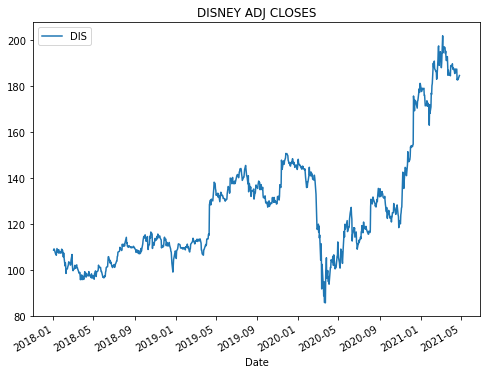

In [15]:
closes_dis.plot(figsize=[8,6])
plt.title('DISNEY ADJ CLOSES')
plt.legend(ticker)
plt.show()

Descarga de los datos de la opción.

In [16]:
dis = web.YahooOptions('DIS')
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-27 23:59:02,2021-04-27 17:40:25,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,217.5,put,DIS210430P00217500,...,2021-04-27 23:59:02,2021-03-16 16:38:35,"{'contractSymbol': 'DIS210430P00217500', 'stri..."
2021-04-30,220.0,call,DIS210430C00220000,...,2021-04-27 23:59:02,2021-04-27 19:34:53,"{'contractSymbol': 'DIS210430C00220000', 'stri..."
2021-04-30,220.0,put,DIS210430P00220000,...,2021-04-27 23:59:02,2021-03-15 04:01:18,"{'contractSymbol': 'DIS210430P00220000', 'stri..."
2021-04-30,195.0,call,DIS210430C00195000,...,2021-04-27 23:59:02,2021-04-27 19:57:20,"{'contractSymbol': 'DIS210430C00195000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-27 23:59:02,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-27 23:59:02,2021-04-27 18:14:45,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-27 23:59:02,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


In [57]:
K = 130
indice_opt = dis_opt.loc[(dis_opt.Type=='put') & (dis_opt.Strike==K) & (dis_opt.Expiry=='2023-01-20')]
indice_opt


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
224,130.0,2023-01-20,put,...,2021-04-27 23:59:02,2021-04-27 18:14:45,"{'contractSymbol': 'DIS230120P00130000', 'stri..."


In [58]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.5,
 'change': -0.1500001,
 'percentChange': -2.2556405,
 'volume': 1,
 'openInterest': 5529,
 'bid': 6.35,
 'ask': 6.9,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619547285,
 'impliedVolatility': 0.3127815304565429,
 'inTheMoney': False}

In [43]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  184.8


### `Simulación usando rendimiento simple`

>Suponemos que los rendimientos $r\sim N(\mu,\sigma_{2})$ 

In [46]:
ret = closes_dis.pct_change().iloc[1:]

Symbols,DIS
Date,
2018-01-03,4.293e-03
2018-01-04,-4.452e-04
2018-01-05,-5.435e-03
2018-01-08,-1.433e-02
2018-01-09,-7.272e-04
...,...
2021-04-21,1.751e-03
2021-04-22,-1.911e-03
2021-04-23,1.423e-03


>Obtengo la media y su desviación estándar.

In [47]:
mu = ret.mean()[0]
sigma = ret.std()[0]

mu,sigma

(0.0008485852183275683, 0.02077946119297525)

>Obtengo un rango de fechas

In [51]:
from datetime import date

today = pd.to_datetime(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry-today).days
nscen = 1000
dates = pd.date_range(start=today, periods = ndays)
ndays 

3